In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train_and_test2.csv') 
df.info()
#titanic=sns.load_dataset('df') #this is giving me error
#titanic=sns.load_dataset('train_and_test2.csv') #this is giving me error


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

## Source of Tiantic.csv:

[kaggle](https://www.kaggle.com/datasets?search=titanic)

Author: Khashayar Baghizadeh Hosseini

## Data cleaning: 
A. Remove multiple uncessary columns:
1. Remove columns with name 'zero' in it because they contain 0s. 
2. Change name of column '2urvived' to 'Survived'
3. Check for null or NaN values in columns. Either ignore, drop, or replace those. 

In [26]:
#Data Cleaning > Remove multiple uncessary columns 

#1. Remove columns with name 'zero' in it

zero_columns = [col for col in df.columns if 'zero' in col] 
#list of all columns named 'zero'

df.drop(columns = zero_columns, inplace = True) 
#drop the list of columns named 'zero'

#print (df.columns) 
#1st way to confirm all columns with name 'zero' removed in df 

assert 'zero' not in df.columns, 'there are still columns named zero' 
#2nd way to confirm all columns with name 'zero' removed in df

#2. Change name of column '2urvived' to 'Survived'

df.rename(columns = {'2urvived':'Survived'}, inplace = True) #rename the column
assert '2urvived' not in df.columns #check if '2urvived' removed as column
assert 'Survived' in df.columns #check if 'Survived' is a column

#3. Check for null or NaN values in columns. Either ignore, drop, or replace those. 
#print (df.isnull().sum()) #check for null values






In [27]:
#3. Check for null or NaN values in columns. Either ignore, drop, or replace those. 

df.Embarked.fillna(2,inplace=True) #replace NaN in Embarked column with 2
#check to see if df.Embarked has no NaN 

assert df.Embarked.isnull().sum() == 0, "There's still NaN value in column Embarked" 

Embarked column has 2 NaN values. Embark dtype is float and indicates number of passengers per Passengerid mean is 1.492731. 25 percentile is 1, and 50 percentile to max is 2. 2 NaN cells out of 1309 total cells is less than 1%. Rounding the mean to 100th place and therefore NaN is replaced with 2.0 

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

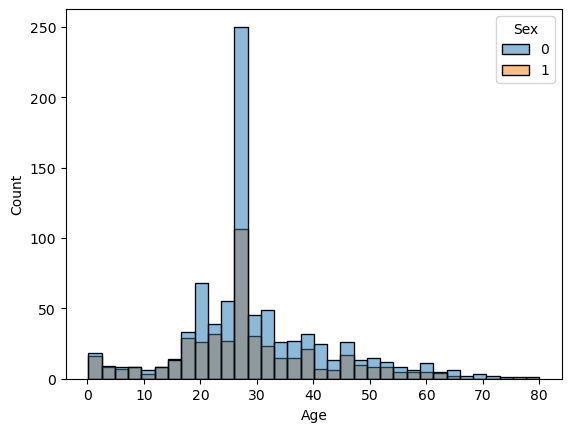

In [28]:
sns.histplot(data=df, x='Age', hue='Sex')
df.columns


In [12]:
print(df.shape)

(1309, 9)


Male survival rate: 0.12930011862396204


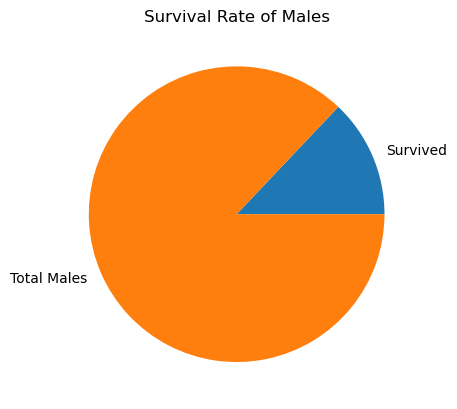

Female survial rate: 0.5


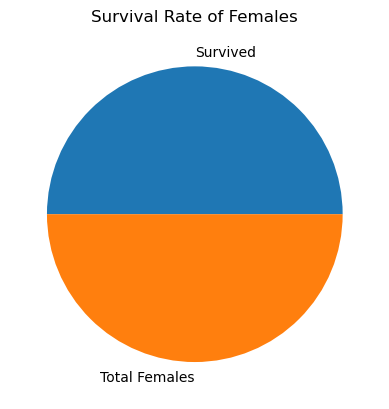

I conclude female survival rate is higher than male survival rate


In [30]:
#What's the survival rate by gender? 

total_male_survived = df[(df['Sex']==0) & (df['Survived']==1)].shape[0]
total_male = df[df['Sex']==0].shape[0]
sur_rate_male = total_male_survived/total_male
pie_data_male=[sur_rate_male,1-sur_rate_male]
pie_data_male_key=['Survived','Total Males']

plt.title("Survival Rate of Males")
print (f"Male survival rate: {sur_rate_male}")
plt.pie(pie_data_male, labels=pie_data_male_key)
plt.show()

total_fem_survived = df[(df['Sex']==1) & (df['Survived']==1)].shape[0]
total_fem = df[df['Sex']==1].shape[0]
sur_rate_female = total_fem_survived/total_fem
pie_data_female=[sur_rate_female, 1-sur_rate_female]
pie_data_female_key=['Survived','Total Females']
#total_fem_survived+total_fem
#first half:  total_fem_survived/total_fem_survived+total_fem
plt.title('Survival Rate of Females')
print (f"Female survial rate: {sur_rate_female}")
plt.pie(pie_data_female, labels=pie_data_female_key)
plt.show()

print("I conclude female survival rate is higher than male survival rate")
#histogram, linegraph, pie graph, box whisker, pairplot, scatterplot, lineplot, bar graph
# sns.barplot(data=sur_rate_male)


In [31]:
#what was the survival rate by pclass?
print(df.columns)
# print (df.Pclass)
print(df.Pclass.value_counts())


Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')
3    709
1    323
2    277
Name: Pclass, dtype: int64


In [32]:
print(df.groupby('Pclass').mean()['Survived'])
#or
# df['Pclass'].groupby()

Pclass
1    0.421053
2    0.314079
3    0.167842
Name: Survived, dtype: float64


In [63]:
#were people who were alone more likely to survive?
#print (df.Parch.value_counts())
#print (df.sibsp.value_counts())
alone_survived = df[(df["Parch"]==0) & (df["sibsp"]==0) & (df['Survived']==1)].shape
print alone_survived

(163, 9)

In [17]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

In [18]:
df['isAlone']=((df['Parch']+df['sibsp'])==0).astype(int).astype(str)
# print(df['isAlone'])
print (df.groupby('isAlone').mean()['Survived'])
print ("People who were not alone were more likely to survived than people who were alone")


isAlone
0    0.344894
1    0.206329
Name: Survived, dtype: float64
People who were not alone were more likely to survived than people who were alone


In [ ]:
#what was the fare distribution for passengers??
#distribution it's either gonna be normalized value counts or a histogram(plot)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

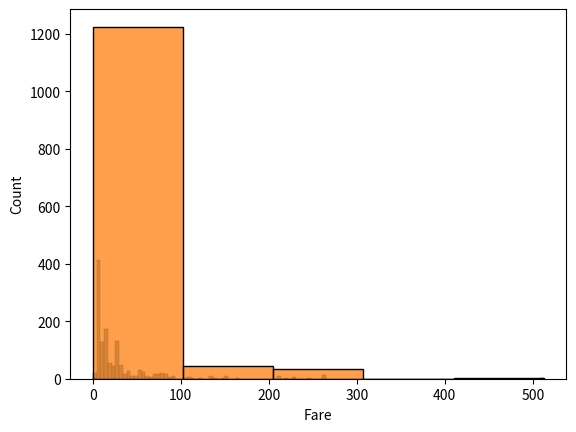

In [ ]:
#what was the fare distribution for passengers??
#print(df.value_counts('Fare'))
# print (df.Fare.value_counts())
sns.histplot(data=df.Fare)
sns.histplot(data=df.Fare, bins=5)

In [ ]:
#Feature Engineering: creating more new useful features than already existing features 
#how to use .apply
def func(inp):
    if 0<=inp<=100:
        return 'under 100'
    elif 100<inp<=200:
        return '100 to 200'
    elif 200<inp<=300:
        return '200 to 300'
    elif 300<inp<=400:
        return '300 to 400'
    elif 400<inp<=500:
        return '400 to 500'
    else:
        return 'Over 500'

#print(df['Fare'])
df['Fare_buckets']=df['Fare'].apply(func)
# print(df['Fare_buckets'])

print (df['Fare_buckets'])
print(df['Fare_buckets'].value_counts(normalize=True))
        


0        under 100
1        under 100
2        under 100
3        under 100
4        under 100
5        under 100
6        under 100
7        under 100
8        under 100
9        under 100
10       under 100
11       under 100
12       under 100
13       under 100
14       under 100
15       under 100
16       under 100
17       under 100
18       under 100
19       under 100
20       under 100
21       under 100
22       under 100
23       under 100
24       under 100
25       under 100
26       under 100
27      200 to 300
28       under 100
29       under 100
30       under 100
31      100 to 200
32       under 100
33       under 100
34       under 100
35       under 100
36       under 100
37       under 100
38       under 100
39       under 100
40       under 100
41       under 100
42       under 100
43       under 100
44       under 100
45       under 100
46       under 100
47       under 100
48       under 100
49       under 100
50       under 100
51       under 100
52       und

In [7]:
#were people who had a higher fare more likely to survive?
df.columns
print (df.groupby('Fare_buckets').mean()['Survived'])

KeyError: 'Fare_buckets'

In [ ]:
#fare distribution by port and interpretation
print(df.columns)
print (df.groupby(['Fare_buckets','Embarked']).mean()['Fare'])

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived', 'isAlone', 'Fare_buckets'],
      dtype='object')
Fare_buckets  Embarked
100 to 200    0.0         123.917458
              2.0         145.604380
200 to 300    0.0         238.715620
              2.0         236.461914
Over 500      0.0         512.329200
under 100     0.0          30.842314
              1.0          12.409012
              2.0          21.525268
Name: Fare, dtype: float64


In [ ]:
#Were people traveling alone more likely to be in a certain class compared to those traveling with family?
#print (df.groupby(['Pclass', 'isAlone'].sum()['Survived'].shape(0))
# print (df.groupby(['Pclass','isAlone']).count())
print (df.groupby(['isAlone'])['Pclass'].value_counts())


isAlone  Pclass
0        3         237
         1         163
         2         119
1        3         472
         1         160
         2         158
Name: Pclass, dtype: int64


In [ ]:
#BONUS:How does the survival rate change if you consider both the gender and the age group (e.g., young males vs. adult females)?


In [ ]:
#Did older passengers generally pay more or less compared to younger ones?


In [ ]:
#